# Demo file for generating and analysing the tanh mock selection function.

In [16]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np, pandas as pd
import scipy, h5py

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

from matplotlib import pyplot as plt, cm
from matplotlib.pyplot import NullFormatter
import matplotlib
from matplotlib.colors import LogNorm
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}
matplotlib.rc('font', **font)

In [18]:
from seestar import SelectionGrid, IsochroneScaling

# Running selection function

In [19]:
folder = '/home/andy/Documents/Research/SF/SFdata/Galaxia_data/'
iso_folder = '/home/andy/Documents/Research/SF/SFdata/'

sys.path.append('/home/andy/Documents/Research/SF/GitRepo/seestar/')
import SelectionGrid, IsochroneScaling, StatisticalModels, SFInstanceClasses

## New selection functions

In [20]:
survey = pd.read_csv(folder + '/Galaxia_sf_survey.csv')
survey['Colour'] = survey.Japp-survey.Kapp

pointings = pd.read_csv(folder + '/Galaxia_sf_fieldinfo.csv')
pointings = pointings[['fieldID', 'glon', 'glat', 'halfangle','Magmin', 'Magmax', 'Colmin', 'Colmax']]
pointings.rename({'glon':'phi', 'glat':'theta'})

pointings = pointings[1:]
pointings.Magmin = 4.
pointings.Magmax = 15.
pointings.Colmin = -0.1
pointings.Colmax = 1.2

In [21]:
def get_photo(field):
    
    file_path = folder + '/photometric/'+str(field)+'.csv'
    field_data = pd.read_csv(file_path, usecols=['Japp', 'Happ', 'Kapp'])
    
    field_data['Colour'] = field_data.Japp - field_data.Kapp
    field_data = np.array(field_data[['Happ', 'Colour']])
    
    # Probability of inclusion
    p = np.ones(field_data.shape[0])
    p = np.exp(-(field_data[:,0]-14.5)**2/0.5**2)
    #p = 1-1/(1+np.exp(-(field_data[:,0]-14.5)*3))
    p[field_data[:,0]<14.5] = 1.
    survive = np.random.rand(field_data.shape[0])<p
    
    return field_data[survive]


def p_tanh(x, y):
    p = 0.1 * (1-np.tanh((x-13.5)/np.exp(-2)))/2\
            * (1+np.tanh((y-0.5)/np.exp(-2)))/2
    return p

def get_spectro(field):
    
    # Get photometric data
    file_path = folder + '/photometric/'+str(field)+'.csv'
    field_data = pd.read_csv(file_path, usecols=['Japp', 'Happ', 'Kapp'])
    field_data['Colour'] = field_data.Japp - field_data.Kapp
    field_data = np.array(field_data[['Happ', 'Colour']])
    
    p = p_rave(field_data[:,0], field_data[:,1])
    
    survive = np.random.rand(field_data.shape[0])<p
    
    return field_data[survive]

In [22]:
# Initialise class
SF = SelectionGrid.SFGenerator(get_spectro, get_photo, pointings, 
                              spectro_model=('BGM_TNC', None), photo_model=('BGM_TNC', None))

The spectro model description is:('BGM_TNC', None)
The photo model description is:('BGM_TNC', None)


In [13]:
# Load in the isochrone interpolant
IsoCalculator = IsochroneScaling.IntrinsicToObservable()
IsoCalculator.LoadColMag(iso_folder+'isochrones/isochrone_interpolantinstances.pickle')

## Generate new selection functions

In [23]:
SF = SelectionGrid.SFGenerator(get_spectro, get_photo, pointings, 
                              spectro_model=('BGM_TNC', None), photo_model=('BGM_TNC', None))

%time SF.gen_obsSF('/file/path/for/save')

The spectro model description is:('BGM_TNC', None)
The photo model description is:('BGM_TNC', None)
Creating colour-magnitude field interpolants...
Finished col-mag calculation: 2.0, 1/2, Time: 0.00m, Left: 0.00m('Prior boundaries: ', array([[ 4. , 15. ],
       [-0.1,  1.2]]))
('N stars = ', 7996)
('priorParams: ', [array([9.5 , 0.55]), 0.0001, array([[0.53777778, 0.        ],
       [0.        , 0.00751111]]), 2.0])
Running BGM
(2, '  BIC: ', -83467.4646592805, '   lnP: ', 41787.65250981397)
(3, '  BIC: ', -85036.08558992397, '   lnP: ', 42598.92306522257)
(4, '  BIC: ', -86710.63354766592, '   lnP: ', 43463.1571341804)
(5, '  BIC: ', -87211.20945545776, '   lnP: ', 43740.405178163186)
(6, '  BIC: ', -87897.70934632185, '   lnP: ', 44110.61521368209)
(7, '  BIC: ', -88214.45835395543, '   lnP: ', 44295.94980758574)
(8, '  BIC: ', -88309.78894852847, '   lnP: ', 44370.57519495912)
(9, '  BIC: ', -88499.02896963629, '   lnP: ', 44492.15529559989)
(10, '  BIC: ', -88609.29484383867, '  

('BGM', array([253.87445888, 245.8726243 ]), '  Test: ', 245.87262430089874)
(3, '   BIC: ', 603.5306939213749, '   lnP: ', -245.87262430089874, '   lnL: ', -262.44031628848427)
(3, '   BIC: ', 603.5306939213749, '   AIC: ', 560.8806325769685, '   AICc: ', 571.8806325769685)
('BGM', array([239.94249757, 228.51747878]), '  Test: ', 228.5174787807115)
(4, '   BIC: ', 613.2349636218205, '   lnP: ', -228.5174787807115, '   lnL: ', -254.18410758130602)
(4, '   BIC: ', 613.2349636218205, '   AIC: ', 556.368215162612, '   AICc: ', 578.368215162612)
('KMS', array([210.07306292, 218.01988298]), '  Test: ', 210.07306292205226)
(5, '   BIC: ', 629.3591928596675, '   lnP: ', -210.07306292205226, '   lnL: ', -249.1378786428284)
(5, '   BIC: ', 629.3591928596675, '   AIC: ', 558.2757572856568, '   AICc: ', 596.2757572856568)
('KMS', array([203.3555303 , 228.53487152]), '  Test: ', 203.35553030270233)
(6, '   BIC: ', 641.133441412524, '   lnP: ', -203.35553030270233, '   lnL: ', -241.91665936185564)


ZeroDivisionError: integer division or modulo by zero

In [24]:
instsf = SF.obsSF[2.0].SF_model
priorParams = StatisticalModels.NIW_prior_params(instsf.prior_sfBounds, shrinker=7.5)

for field in SF.pointings.fieldID:
    sampler = SF.obsSF[field].SF_model.optimize(priorParams, 'emceeBHM', niter=1000)

AttributeError: SFGenerator instance has no attribute 'obsSF'

In [16]:
SF.save_obsSF('/home/andy/Documents/Research/data/asfe2/Projects/sf_data/mockrave_obsSF_fields23_corrBIC.pickle')

Overwrite /home/andy/Documents/Research/data/asfe2/Projects/sf_data/mockrave_obsSF_fields23_corrBIC.pickle? (y/n)y

Pickling observable SF...


In [365]:
instsf = SF.obsSF[2.0].SF_model
instdf = SF.obsSF[2.0].DF_model
params_df = instsf.params_df

In [346]:
instsf.prior_sfBounds[0,:]*instsf.sx + instsf.mux, instsf.prior_sfBounds[1,:]*instsf.sy + instsf.muy

(array([ 4., 15.]), array([-0.1,  1.2]))

In [347]:
phot = pd.read_csv('/home/andy/Documents/Research/data/asfe2/Projects/sf_data/Galaxia_data/photometric/3.0.csv')
x = phot.Happ
y = phot.Japp-phot.Kapp
xs = (x-instsf.mux)/instsf.sx
ys = (y-instsf.muy)/instsf.sy

sf_params = instsf.params_f_scaled.copy()
pSelect = StatisticalModels.bivGaussMixture(sf_params, xs, ys)
uncut = (x<13.5)&(y>0.5)
len(instsf.x), np.sum(pSelect), np.sqrt(np.sum(pSelect)), np.sum(pSelect*uncut), np.sqrt(np.sum(pSelect*uncut))

(182,
 180.43952261106813,
 13.432777918623836,
 144.5324937195229,
 12.022166764752638)

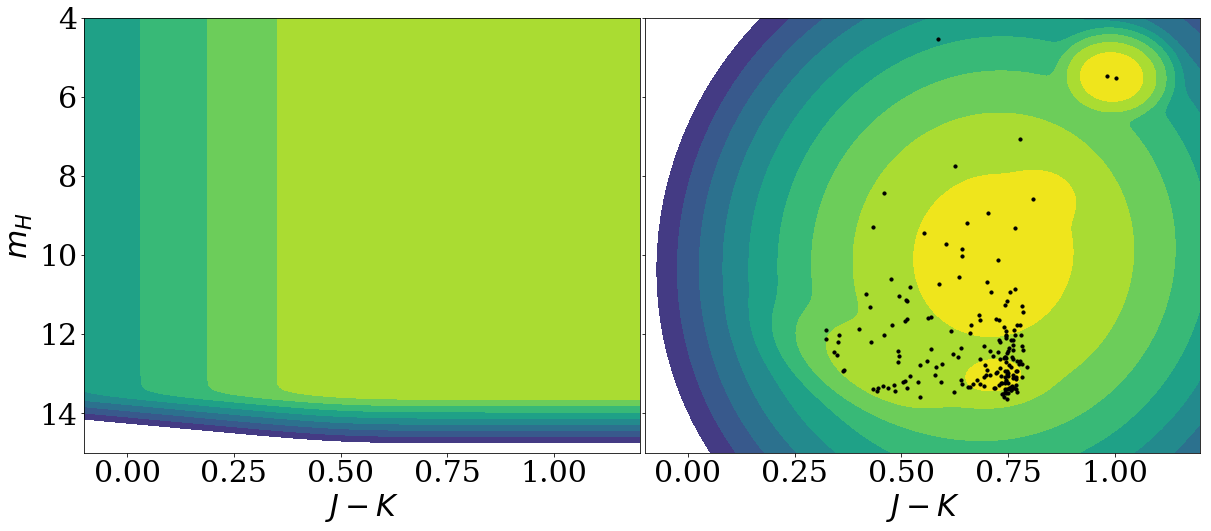

In [351]:
fig, axes = plt.subplots(1,2,figsize=(20,8), sharey=True)

x = np.linspace(-0.1, 1.2, 300)
y = np.linspace(4, 15, 420)
xx, yy = np.meshgrid(y, x, indexing='ij')
extent=[np.min(x), np.max(x), np.max(y), np.min(y)]
vmin, vmax = (1e-10,1)

levels=10**(np.arange(10)-9.)
cmap = cm.viridis
cmap.set_under('k')

plt.sca(axes[0])
#zz = np.flip(p_tanh(xx.flatten(), yy.flatten()).reshape(xx.shape), axis=0)
zz = p_tanh(xx.flatten(), yy.flatten()).reshape(xx.shape)
#im=plt.imshow(zz, vmin=vmin, vmax=vmax, norm=LogNorm(), cmap='viridis', extent=extent, aspect='auto')
plt.contourf(x, y, zz, vmin=vmin, vmax=vmax, norm=LogNorm(), cmap=cmap, extent=extent,
            levels=levels)
plt.xlabel(r'$J-K$')
plt.ylabel(r'$m_H$')

plt.sca(axes[1])
zz = StatisticalModels.bivGaussMixture(instsf.params_f, xx, yy)
CS = plt.contourf(x, y, zz, cmap=cmap, norm=LogNorm(), vmin=vmin, vmax=vmax,
                 levels=levels)
plt.scatter(instsf.y, instsf.x, s=10, c='k')
plt.xlabel(r'$J-K$')

plt.ylim(extent[2], extent[3])

plt.subplots_adjust(wspace=0.01)

In [55]:
priorParams = StatisticalModels.NIW_prior_params(instsf.prior_sfBounds)

for field in SF.pointings.fieldID:
    sampler = SF.obsSF[field].SF_model.optimize(priorParams, 'emceeBHM', niter=1000)

emcee with 1000 iterations, 192 walkers...



emcee with 1000 iterations, 216 walkers...


In [57]:
SF.save_obsSF('/home/andy/Documents/Research/data/asfe2/Projects/sf_data/mockrave_obsSF_fields23.pickle')

Overwrite /home/andy/Documents/Research/data/asfe2/Projects/sf_data/mockrave_obsSF_fields23.pickle? (y/n)y

Pickling observable SF...


# Intrinsic coordinates

In [50]:
def get_spectro(field):
    
    # Get photometric data
    file_path = folder + '/photometric/'+str(field)+'.csv'
    field_data = pd.read_csv(file_path, usecols=['Japp', 'Happ', 'Kapp'])
    field_data['Colour'] = field_data.Japp - field_data.Kapp
    field_data = np.array(field_data[['Happ', 'Colour']])
    
    p = p_tanh(field_data[:,0], field_data[:,1])
    
    survive = np.random.rand(field_data.shape[0])<p
    
    return field_data[survive] 

SF = SelectionGrid.SFGenerator(get_spectro, get_photo, pointings, 
                              spectro_model=('BGM_TNC', None), photo_model=('BGM_TNC', None))

%time SF.load_obsSF('/home/andy/Documents/Research/data/asfe2/Projects/sf_data/mocktanh_obsSF_fields23_corrBIC.pickle')

The spectro model description is:('BGM_TNC', None)
The photo model description is:('BGM_TNC', None)
Unpickling colour-magnitude interpolant dictionaries...
...done.

CPU times: user 116 ms, sys: 236 ms, total: 352 ms
Wall time: 353 ms


In [51]:
SF.gen_intSF('/home/andy/Documents/Research/data/asfe2/Projects/sf_data/mocktanh_obsSF_fields23_int_corrBIC.pickle', 
             IsoCalculator)

Creating distance-age-metallicity interpolants...
...done.

Save as /home/andy/Documents/Research/data/asfe2/Projects/sf_data/mocktanh_obsSF_fields23_int_corrBIC.pickle? (y/n)y

Pickling intrinsic SF...


# KS test

In [ ]:
params_spec = StatisticalModels.gmm_product_params(instsf.params_f_scaled, instsf.params_df)

Xdf = StatisticalModels.feature_scaling(instsf.photoDF.x, instsf.photoDF.y, instsf.mux, instsf.muy, instsf.sx, instsf.sy)
Xdf = np.vstack((Xdf[0], Xdf[1])).T

Xsf = np.vstack((instsf.x_s, instsf.y_s)).T

# ... still working on this demo file

In [293]:
instsf = SFInstanceClasses.obsSF_dicttoclass(SFInstanceClasses.obsSF_classtodict(SF.obsSF))[2.0].SF_model
instdf = SFInstanceClasses.obsSF_dicttoclass(SFInstanceClasses.obsSF_classtodict(SF.obsSF))[2.0].DF_model

In [290]:
params_spec = StatisticalModels.gmm_product_params(instsf.params_f_scaled, instsf.params_df)

Xdf = StatisticalModels.feature_scaling(instsf.photoDF.x, instsf.photoDF.y, instsf.mux, instsf.muy, instsf.sx, instsf.sy)
Xdf = np.vstack((Xdf[0], Xdf[1])).T

Xsf = np.vstack((instsf.x_s, instsf.y_s)).T

In [291]:
def marginal_dist(x, params, axis):
    if axis=='x':
        mu = params[:,0]
        cov = params[:,2]
    elif axis=='y':
        mu = params[:,1]
        cov = params[:,3]
        
    exponent = -0.5*(x[:,np.newaxis]-mu[np.newaxis,:])**2 / (cov[np.newaxis,:])
    norm = 1/np.sqrt(2*np.pi*cov)[np.newaxis,:]
        
    return np.sum(params[:,5][np.newaxis,:]*norm*np.exp(exponent), axis=1)

def marginal_cdf(x, params, axis, normed=False):
    if axis=='x':
        mu = params[:,0]
        cov = params[:,2]
    elif axis=='y':
        mu = params[:,1]
        cov = params[:,3]
        
    components =  0.5*(scipy.special.erf((x[:,np.newaxis] - mu[np.newaxis,:])/(np.sqrt(2*cov[np.newaxis,:]))) + 1)
        
    if normed:
        return np.sum(params[:,5][np.newaxis,:]*components, axis=1)/np.sum(params[:,5])
    return np.sum(params[:,5][np.newaxis,:]*components, axis=1)

def marginal_cdf_bounded(x, params, axis, normed=False, bound=0.):
    if axis=='x':
        mu = params[:,0]
        cov = params[:,2]
    elif axis=='y':
        mu = params[:,1]
        cov = params[:,3]
    
    result = np.zeros(len(x))
    result[x>bound] = 1.
    
    components =  0.5*(scipy.special.erf((x[:,np.newaxis] - mu[np.newaxis,:])/(np.sqrt(2*cov[np.newaxis,:]))) + 1)
    norm = np.sum(params[:,5] * 0.5*(scipy.special.erf((bound - mu)/(np.sqrt(2*cov))) + 1))
        
    print(norm)
        
    if normed:
        result[x<=bound] = np.sum(params[:,5][np.newaxis,:]*components[x<=bound], axis=1)/norm
        return result
    return np.sum(params[:,5][np.newaxis,:]*components, axis=1)

def normed_marginal_cdf(x, params, axis):
    if axis=='x':
        mu = params[:,0]
        cov = params[:,2]
    elif axis=='y':
        mu = params[:,1]
        cov = params[:,3]
        
    components =  0.5*(scipy.special.erf((x - mu)/(np.sqrt(2*cov))) + 1)
        
    return np.sum(params[:,5]*components)/np.sum(params[:,5])